In [1]:
import numpy as np
import pandas as pd
import os 
rutaBase = os.getcwd().replace('\\', '/') + '/'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [27]:
rutaCHC = 'F:/OneDrive - Universidad de Cantabria/Series/CHC/SAI/tratadas/5min/'
rutaOut = 'F:/OneDrive - Universidad de Cantabria/Clases/Grado/G1448 - Hydrology/Exercises/1-Precipitation/data/'

In [3]:
stns = ['A618', 'A605', 'A621', 'A623', 'Q101', 'A614', 'A353', 'A073', 'N033',
        'A603', 'A074', 'A619', 'A600']

In [19]:
dict_pcp = {}
start, end = pd.datetime(2100, 12, 31, 23, 55), pd.datetime(1900, 1, 1, 0, 0)
for stn in stns:
    aux = pd.read_csv(rutaCHC + stn + '.csv', encoding='latin1', parse_dates=True, index_col=0)
    dict_pcp[stn] = aux.precipitacion_mm
    start = min(start, aux.index.min())
    end = max(end, aux.index.max())

start, end

In [32]:
pcp = pd.DataFrame(index=pd.date_range(start, end, freq='5min'), columns=stns)
pcp.index.name = 'Fecha'
for stn in stns:
    st, en = dict_pcp[stn].index[0], dict_pcp[stn].index[-1]
    pcp.loc[st:en, stn] = dict_pcp[stn]

In [33]:
pcp.to_csv(rutaOut + 'precipitacion_Sella.csv', float_format='%.1f')

In [35]:
pcp.count()

A618    794538
A605    863166
A621    701631
A623    744158
Q101    323258
A614    272673
A353    769057
A073    862676
N033    851294
A603    700293
A074    347256
A619    271254
A600    750941
dtype: int64

In [38]:
stn = stns[0]
print(pcp[stn].first_valid_index(), pcp[stn].last_valid_index())

2011-11-10 13:50:00 2019-05-31 23:55:00


In [41]:
resumen = pd.DataFrame(index=stns, columns=['count', 'start', 'end'])

In [43]:
for stn in pcp.columns:
    resumen.loc[stn,:] = pcp[stn].count(), pcp[stn].first_valid_index(), pcp[stn].last_valid_index()
resumen.sort_values('count', ascending=False, inplace=True)
resumen

,count,start,end
A605,863166,2011-03-17 10:15:00,2019-05-31 23:55:00
A073,862676,2011-03-18 12:50:00,2019-05-31 23:55:00
N033,851294,2011-04-27 12:20:00,2019-05-31 23:55:00
A618,794538,2011-11-10 13:50:00,2019-05-31 23:55:00
A353,769057,2012-02-03 13:20:00,2019-05-31 23:55:00
A600,750941,2012-04-10 13:35:00,2019-05-31 23:55:00
A623,744158,2012-04-10 14:40:00,2019-05-31 23:55:00
A621,701631,2012-09-27 18:35:00,2019-05-31 23:55:00
A603,700293,2012-10-02 17:45:00,2019-05-31 23:55:00
A074,347256,2016-02-04 11:45:00,2019-05-31 23:55:00


## Datos AEMET 

In [44]:
rutaAEMET = 'G:/CLIMA/02_HYDRO-CLIMATE/DatosHorarios/AEMET_horario/'

In [65]:
AEMET = pd.read_csv(rutaAEMET + 'PrecipitaciónHoraria.csv', sep=';', encoding='latin1')

AEMET.head(2)

,INDICATIVO,AÑO,MES,DIA,NOMBRE,ALTITUD,NOM_PROV,LONGITUD,LATITUD,DATUM,...,PH15,PH16,PH17,PH18,PH19,PH20,PH21,PH22,PH23,PH24
0,B434X,2005,1,1,PORTO COLOM,17,BALEARES,316181,392452,ETRS89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,B434X,2005,1,2,PORTO COLOM,17,BALEARES,316181,392452,ETRS89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [70]:
mask = (AEMET.NOM_PROV == 'ASTURIAS') | (AEMET.NOM_PROV == 'CANTABRIA')
AEMET = AEMET.loc[mask, :]
AEMET.tail(2)

,INDICATIVO,AÑO,MES,DIA,NOMBRE,ALTITUD,NOM_PROV,LONGITUD,LATITUD,DATUM,...,PH15,PH16,PH17,PH18,PH19,PH20,PH21,PH22,PH23,PH24
13989,1331D,2014,6,18,FIGUERAS DE CASTROPOL,40,ASTURIAS,701082,433207,ETRS89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13990,1331D,2014,6,19,FIGUERAS DE CASTROPOL,40,ASTURIAS,701082,433207,ETRS89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [69]:
for nombre in AEMET.NOMBRE.unique():
    aux = AEMET.loc[AEMET.NOMBRE == nombre,:]
    print(nombre, aux.AÑO.iloc[0], aux.AÑO.iloc[-1])

SANTANDER/PARAYAS 2005 2009
OVIEDO 2005 2014
FIGUERAS DE CASTROPOL 2005 2014


In [67]:
len(AEMET.NOMBRE.unique())

37

In [76]:
cod = AEMET.loc[AEMET.NOMBRE == 'OVIEDO'].INDICATIVO.iloc[0]

In [79]:
raw = AEMET.loc[AEMET.INDICATIVO == cod,:]
raw.head()

,INDICATIVO,AÑO,MES,DIA,NOMBRE,ALTITUD,NOM_PROV,LONGITUD,LATITUD,DATUM,...,PH15,PH16,PH17,PH18,PH19,PH20,PH21,PH22,PH23,PH24
7473,1249I,2005,1,1,OVIEDO,336,ASTURIAS,552272,432112,ETRS89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7474,1249I,2005,1,2,OVIEDO,336,ASTURIAS,552272,432112,ETRS89,...,-3.0,-3.0,0.0,11.0,6.0,1.0,0.0,1.0,1.0,0
7475,1249I,2005,1,3,OVIEDO,336,ASTURIAS,552272,432112,ETRS89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7476,1249I,2005,1,4,OVIEDO,336,ASTURIAS,552272,432112,ETRS89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7477,1249I,2005,1,5,OVIEDO,336,ASTURIAS,552272,432112,ETRS89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0


In [82]:
rutaAEMET = 'G:/CLIMA/02_HYDRO-CLIMATE/AEMET/precipitacion/horario/output/'
raw = pd.read_csv(rutaAEMET + 'Dataframe_hourly.csv', parse_dates=True, index_col=0)

In [84]:
raw['1249I'].first_valid_index(), raw['1249I'].last_valid_index()

(Timestamp('2005-01-01 00:00:00'), Timestamp('2014-12-31 23:00:00'))

In [85]:
pcp_h = raw['1249I']

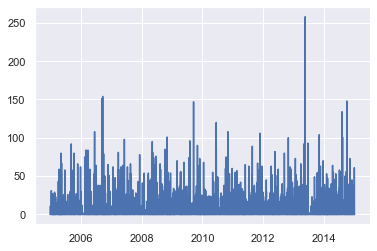

In [86]:
plt.figure(figsize=(15, 4))
plt.plot(pcp_h)